# Trabajo Práctico I - Regresión

## Contexto del Ejercicio

En los últimos años, se han llevado a cabo varios estudios para analizar los niveles de contaminación atmosférica en la ciudad de Madrid, con el objetivo de identificar las principales fuentes de contaminantes atmosféricos y desarrollar estrategias efectivas para reducir sus impactos ambientales y sanitarios.

El departamento de investigación del Ministerio para la Transición Ecológica considera posible identificar qué característica específica predice de manera más directa la concentración de benceno (C₆H₆) en el aire urbano mediante el análisis de múltiples atributos del conjunto de datos.

El primer ejercicio consiste en construir modelos de regresión simple que predigan la concentración de benceno (C₆H₆) en el aire urbano utilizando diferentes atributos. 

## Ejercicio 1 - Regresión Simple

### Paso 1 - Preparación del entorno

En esta primera sección el objetivo es preparar el conjunto de datos para su posterior uso en el entrenamiento de los modelos de regresión. Como punto de partida, se importan las librerías necesarias y se carga el dataframe a partir del archivo CSV proporcionado.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Carga de datos
df = pd.read_csv('air_quality.csv', sep=";", decimal=",")

A continuación se comprueba el tamaño del dataset.

In [2]:
# Tamaño del dataset
print("\nTamaño del dataset (filas, columnas):", df.shape)


Tamaño del dataset (filas, columnas): (9471, 17)


El conjunto de datos está compuesto por 9.471 observaciones y 17 variables, lo que proporciona una base suficientemente amplia para llevar a cabo el análisis de regresión.

Antes de analizar en profundidad las características, distribuciones y correlaciones de las variables, comenzamos realizando un estudio descriptivo del dataframe. Este análisis inicial permite comprender mejor la estructura del conjunto de datos e identificar posibles fuentes de error que deberán ser tratadas posteriormente durante el proceso de preprocesamiento.

A continuación se realizan tres inspecciones rápidas mediante las funciones df.head(), df.info() y df.describe() con el fin de examinar la estructura general del dataframe y obtener una primera comprensión de sus variables y sus características básicas.

In [3]:
# Mostramos las primeras 5 instancias (filas) de nuestro dataframe
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


A partir de las primeras filas del dataframe se observa que las variables finales, denominadas Unnamed: 15 y Unnamed: 16, no contienen información relevante y aparecen completamente vacías. La ausencia de un nombre descriptivo y la presencia exclusiva de valores faltantes sugieren que se trata de columnas residuales generadas durante la exportación del CSV. Por este motivo, deberán ser eliminadas en el preprocesamiento para evitar inconsistencias y garantizar que no afecten al posterior entrenamiento de los modelos de regresión.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


A partir de la información proporcionada por la función df.info(), se confirma que el dataset está compuesto por 9.471 instancias y 17 variables, de las cuales 15 aparecen inicialmente como numéricas (float64) y 2 como tipo object. No obstante, esta información requiere matizarse: las columnas Unnamed: 15 y Unnamed: 16 no contienen ningún valor válido (su Non-Null Count es 0) y, además, carecen de un nombre descriptivo. Esto indica que se trata de columnas residuales generadas durante la exportación del archivo CSV. Por tanto, estas variables serán eliminadas en la etapa de preprocesamiento, lo que deja al dataset con un total de 15 variables, de las cuales 13 son numéricas reales.

Las dos variables de tipo object, Date y Time, corresponden a información temporal registrada como cadenas de texto. Más adelante se decidirá si se transforman o se excluyen del análisis, dependiendo de su utilidad para la regresión.

Para contextualizar adecuadamente el conjunto de datos y facilitar la comprensión de las variables durante el análisis descriptivo y estadístico, se presenta a continuación una descripción de cada una de ellas según el enunciado de la práctica:

    •    Fecha: Representa la fecha del calendario en la que se registraron las mediciones de calidad del aire.
    •    Hora: Indica la hora específica del día correspondiente a cada medición.
    •    CO (GT): Concentración horaria promedio real de monóxido de carbono (CO) en mg/m³, medida por el analizador de referencia.
    •    PT08.S1 (CO): Respuesta horaria promedio del sensor principalmente destinado a detectar monóxido de carbono.
    •    NMHC (GT): Concentración horaria promedio real de hidrocarburos no metánicos (NMHC) en µg/m³, medida por el analizador de referencia.
    •    C6H6 (GT): Concentración horaria promedio real de benceno (C₆H₆) en µg/m³, medida por el analizador de referencia.
    •    PT08.S2 (NMHC): Respuesta horaria promedio del sensor nominalmente destinado a detectar hidrocarburos no metánicos.
    •    NOx (GT): Concentración horaria promedio real de óxidos de nitrógeno (NOx) en ppb, medida por el analizador de referencia.
    •    PT08.S3 (NOx): Respuesta horaria promedio del sensor principalmente destinado a detectar óxidos de nitrógeno.
    •    NO2 (GT): Concentración horaria promedio real de dióxido de nitrógeno (NO₂) en µg/m³, medida por el analizador de referencia.
    •    PT08.S4 (NO2): Respuesta horaria promedio del sensor diseñado para detectar dióxido de nitrógeno.
    •    PT08.S5 (O3): Respuesta horaria promedio del sensor nominalmente destinado a detectar ozono (O₃).
    •    T: Temperatura ambiente en grados Celsius (°C) registrada en el momento de la medición.
    •    RH: Humedad relativa del aire expresada como porcentaje (%).
    •    AH: Humedad absoluta, que representa la cantidad total de vapor de agua en el aire.

In [5]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,NaN,NaN
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,NaN,NaN
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,NaN,NaN
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


Por último, la función df.describe() proporciona estadísticas descriptivas básicas de las variables numéricas del dataframe, incluyendo la media, la desviación estándar, los valores mínimo y máximo, así como los cuartiles. Esta información resulta útil para comprender los rangos de valores presentes en cada variable y para detectar posibles inconsistencias o errores de medición que deberán abordarse en el preprocesamiento.

Un aspecto llamativo de la salida es que todas las variables numéricas presentan un valor mínimo de –200. Este valor no tiene sentido dentro del contexto de las magnitudes analizadas y, por tanto, indica la presencia de un error de medición sistemático utilizado como código para representar datos ausentes o inválidos. Durante el preprocesamiento será necesario tratar estos valores para evitar que afecten al entrenamiento de los modelos de regresión.

Además, la presencia de este valor atípico en todas las variables numéricas distorsiona el cálculo de las estadísticas básicas (como la media y la desviación estándar), por lo que su correcta gestión es un paso esencial antes de proceder con el análisis predictivo.

Para concluir este análisis descriptivo inicial del conjunto de datos, se examina la cantidad de valores faltantes presentes en cada variable. Este paso permite identificar si será necesario aplicar técnicas específicas de tratamiento de valores nulos durante el preprocesamiento posterior, garantizando así la calidad y consistencia de los datos antes del entrenamiento de los modelos.

In [6]:
df.isna().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

Con toda esta información descriptiva inicial del dataframe, disponemos de una visión más completa de su estado y de los problemas potenciales que pueden afectar al análisis. Esto permite planificar de manera fundamentada los pasos necesarios en el preprocesamiento para limpiar y preparar adecuadamente los datos antes de entrenar los modelos de regresión.

### Análisis Exploratorio de Datos

Antes de iniciar el preprocesamiento para la limpieza y preparación del dataframe, se realiza un estudio estadístico de las variables, con especial atención a la variable objetivo C6H6(GT). En esta sección se analizan las distribuciones de las variables numéricas, las correlaciones entre estas y la variable objetivo, así como un diagrama de cajas que permite visualizar la presencia de valores atípicos. Estos análisis proporcionan una comprensión más profunda del comportamiento de los datos y ayudan a fundamentar las decisiones que se tomarán en el preprocesamiento posterior.

Número de columnas numéricas: 15


<Figure size 1200x1000 with 0 Axes>

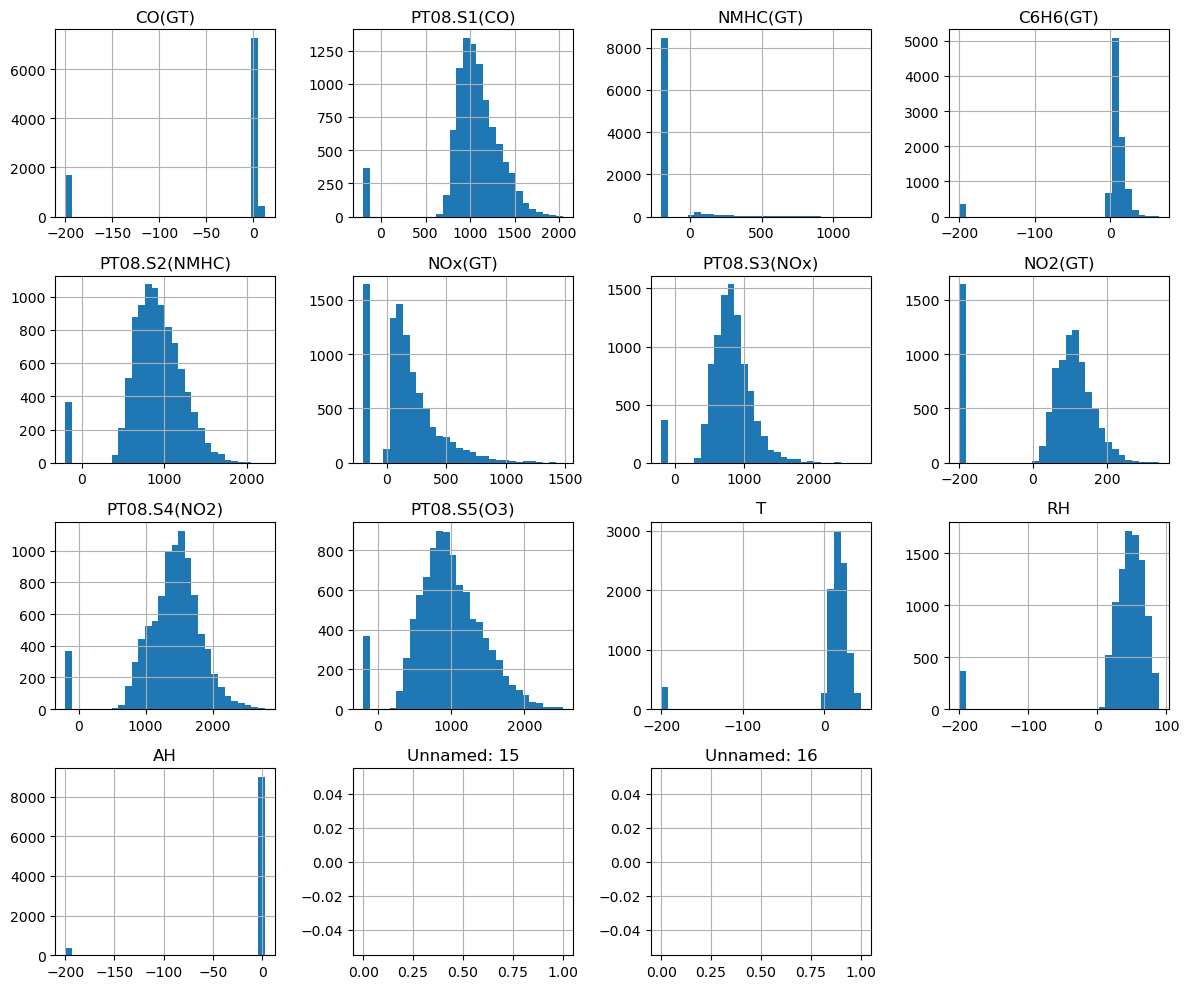

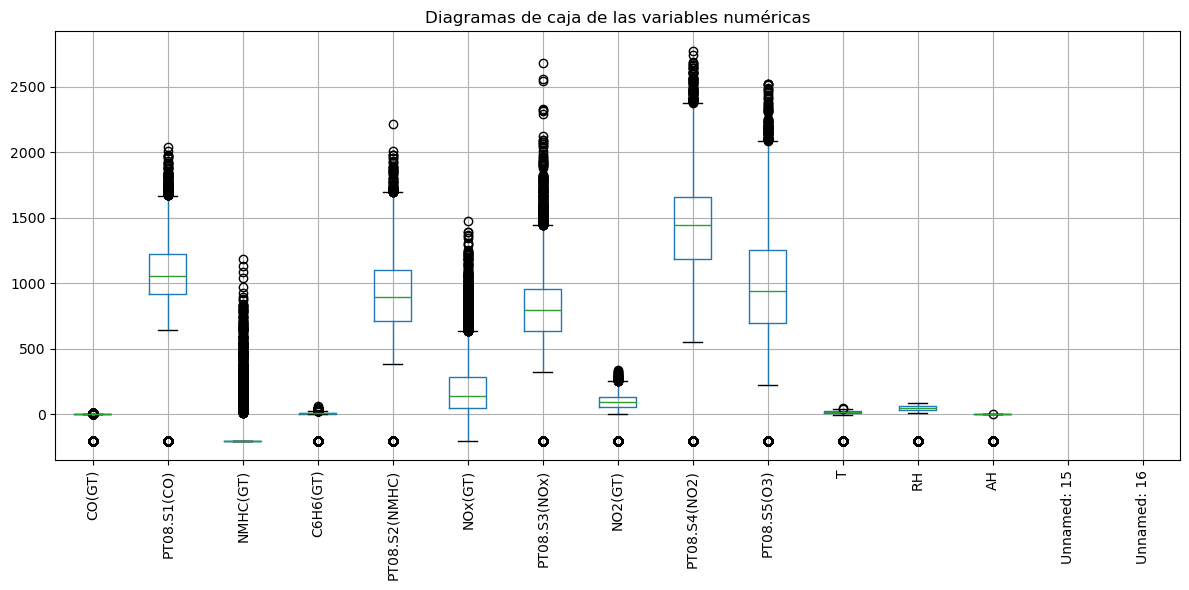

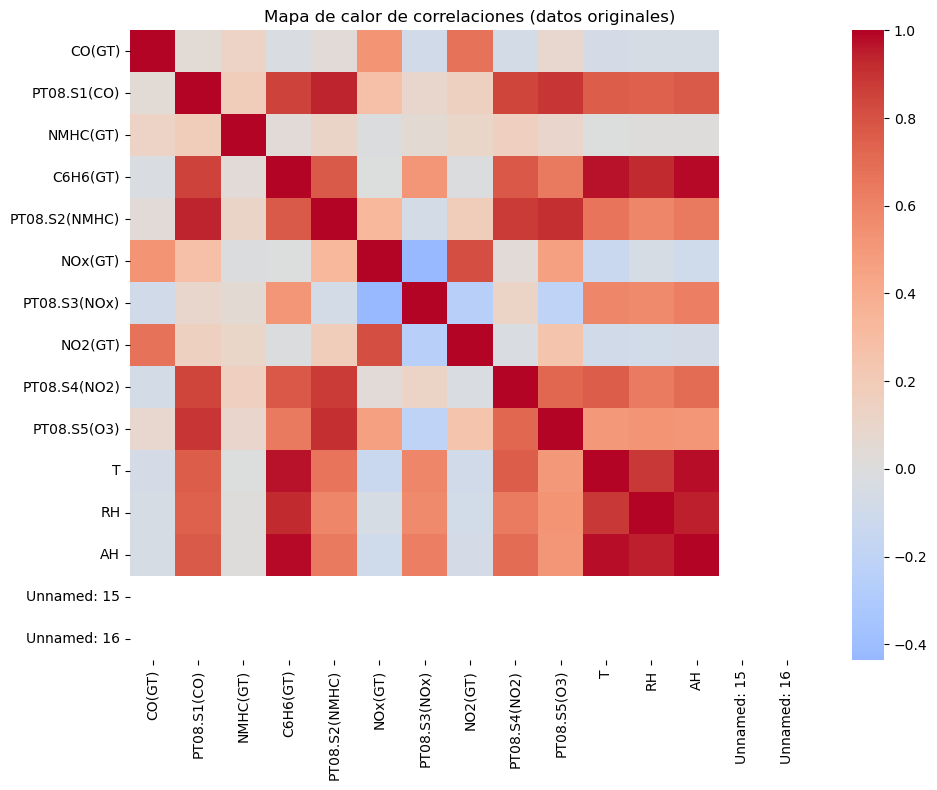

In [7]:
# Seleccionar columnas numéricas
columnas_numericas = df.select_dtypes(include=["float64", "int64"]).columns.tolist()

print("Número de columnas numéricas:", len(columnas_numericas))

# Histograma de las variables numéricas
plt.figure(figsize=(12, 10))
df[columnas_numericas].hist(bins=30, figsize=(12, 10))
plt.tight_layout()
plt.show()

# Diagramas de caja para detectar valores atípicos
plt.figure(figsize=(12, 6))
df[columnas_numericas].boxplot(rot=90)
plt.title("Diagramas de caja de las variables numéricas")
plt.tight_layout()
plt.show()

# Mapa de calor de correlaciones
plt.figure(figsize=(10, 8))
matriz_corr = df[columnas_numericas].corr()
sns.heatmap(matriz_corr, cmap="coolwarm", center=0)
plt.title("Mapa de calor de correlaciones (datos originales)")
plt.tight_layout()
plt.show()

### Preprocesamiento de Datos

A continuación se lleva a cabo el preprocesamiento y la limpieza de los datos con el objetivo de preparar el dataframe para el entrenamiento de los modelos. Tal y como se ha observado en los apartados anteriores, el conjunto de datos presenta diversas fuentes de error, entre ellas la presencia de las columnas Unnamed:15 y Unnamed:16, así como valores faltantes y atípicos.

En primer lugar, se eliminan las columnas Unnamed:15 y Unnamed:16, dado que únicamente contienen valores faltantes y no aportan información útil al análisis. Asimismo, se eliminan las variables Date y Time, ya que no resultan relevantes para la construcción de un modelo de regresión lineal simple orientado a predecir la concentración de benceno y no proporcionan información significativa para dicho propósito.

In [8]:
df = df.drop(columns=["Unnamed: 15", "Unnamed: 16"])
df = df.drop(columns=["Date", "Time"])
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


A continuación vamos a tratar las filas en nuestro dataframe cuyas variables presentan el valor -200. Primero, visualicemos cuantas veces cada variable presenta el valor -200 en el dataframe.

In [9]:
minus_200_counts = (df == -200).sum()
minus_200_counts

CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

Para abordar este problema, se reemplazan los valores –200 por NaN en el dataframe, de modo que puedan ser identificados y manejados adecuadamente durante el proceso de limpieza.

In [10]:
# Reemplazamos el valor -200 por NaN, ya que indica mediciones inválidas
df = df.replace(-200, np.nan)

# Comprobamos cuántos NaN hay ahora por columna
na_counts = df.isna().sum()
na_counts

CO(GT)           1797
PT08.S1(CO)       480
NMHC(GT)         8557
C6H6(GT)          480
PT08.S2(NMHC)     480
NOx(GT)          1753
PT08.S3(NOx)      480
NO2(GT)          1756
PT08.S4(NO2)      480
PT08.S5(O3)       480
T                 480
RH                480
AH                480
dtype: int64

Tras reemplazar los valores inválidos, las variables siguen presentando valores faltantes. Para garantizar la consistencia del conjunto de datos y evitar problemas durante el entrenamiento, se procede a eliminar todas las filas que contienen valores NaN.

In [11]:
df = df.dropna()
na_counts_after = df.isna().sum()
na_counts_after

CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

Se confirma que, tras la limpieza realizada, el dataframe ya no contiene valores faltantes.

Para seleccionar los atributos candidatos con los que entrenar los modelos de regresión lineal simple, se opta por elegir las cinco variables que presentan mayor coeficiente de correlación con la variable objetivo C6H6(GT). Esta estrategia permite identificar los predictores con una relación lineal más fuerte con la concentración de benceno, lo que facilita la construcción de modelos más informativos y comparables.

In [12]:
# Correlación de todas las numéricas con C6H6(GT)
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
corr_matrix = df[numeric_cols].corr()
corr_with_c6h6 = corr_matrix["C6H6(GT)"].sort_values(ascending=False)
corr_with_c6h6

C6H6(GT)         1.000000
PT08.S2(NMHC)    0.984834
CO(GT)           0.972660
PT08.S4(NO2)     0.960811
PT08.S1(CO)      0.931368
NOx(GT)          0.927304
NMHC(GT)         0.897928
PT08.S5(O3)      0.896978
NO2(GT)          0.846743
T                0.418409
AH               0.313415
RH              -0.178410
PT08.S3(NOx)    -0.848850
Name: C6H6(GT), dtype: float64

In [13]:
# Elegimos las 5 variables (además de C6H6(GT)) con mayor correlación absoluta
top_candidates = corr_with_c6h6.abs().sort_values(ascending=False).index

# Quitamos la propia C6H6(GT)
top_candidates = [col for col in top_candidates if col != "C6H6(GT)"]

# Nos quedamos, por ejemplo, con las 5 mejores candidatas
candidate_features = top_candidates[:5]
candidate_features

['PT08.S2(NMHC)', 'CO(GT)', 'PT08.S4(NO2)', 'PT08.S1(CO)', 'NOx(GT)']

No ha sido necesario aplicar técnicas de escalado, normalización ni codificación de variables, ya que el modelo de regresión lineal simple se construye únicamente a partir de variables numéricas y todas ellas se encuentran en un formato adecuado para su uso directo.

Antes de avanzar a la siguiente fase del ejercicio —la creación de los conjuntos de entrenamiento y prueba y la posterior implementación de los modelos de regresión lineal— se muestran nuevamente las distribuciones y correlaciones del dataset ya limpio. Esto resulta necesario porque las visualizaciones realizadas previamente estaban basadas en el dataframe original, que contenía errores y valores inválidos. Las nuevas gráficas permiten evaluar la estructura real de los datos y confirmar que el preprocesamiento ha dejado el conjunto en condiciones óptimas para el modelado.

Número de columnas numéricas: 13


<Figure size 1200x1000 with 0 Axes>

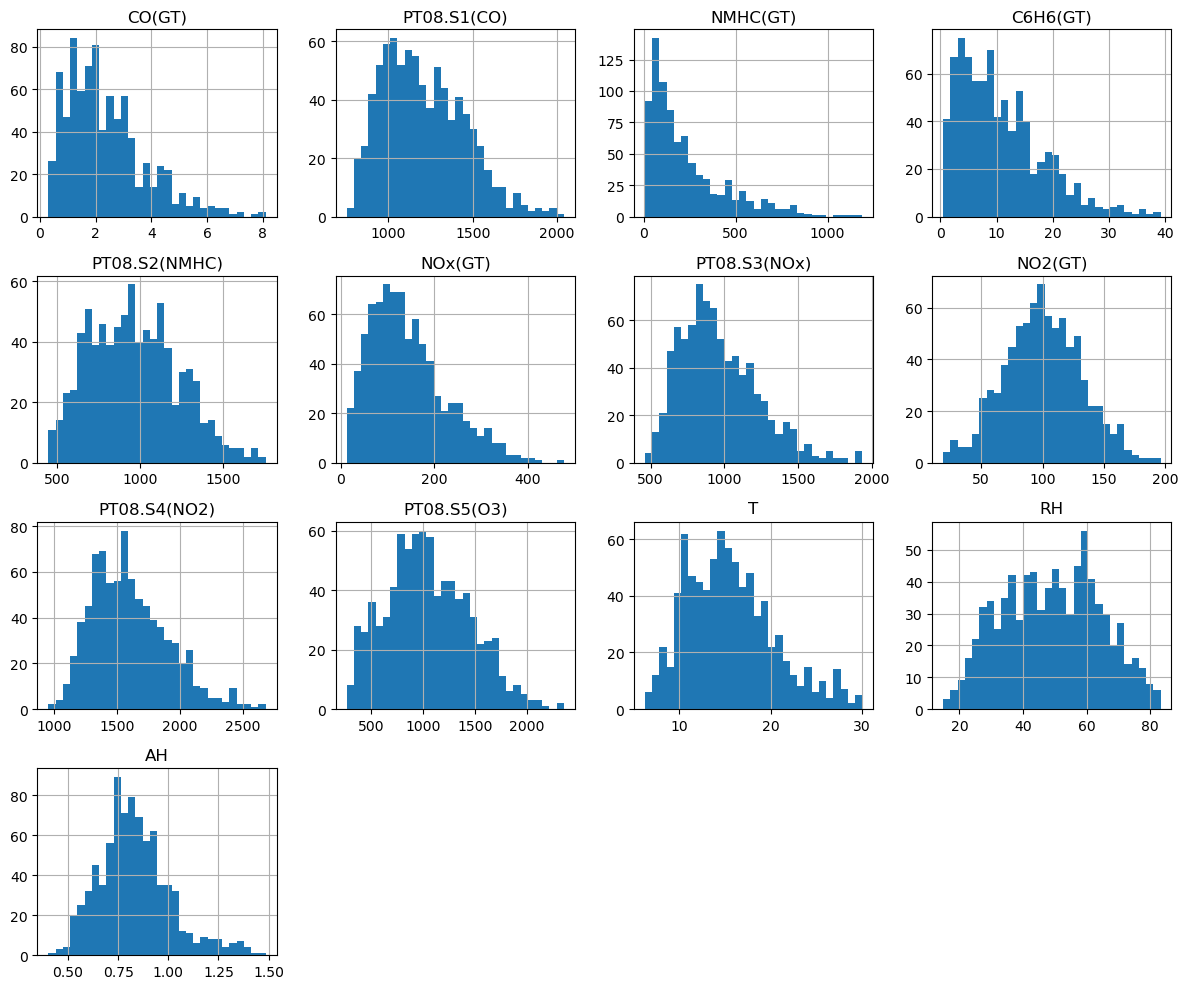

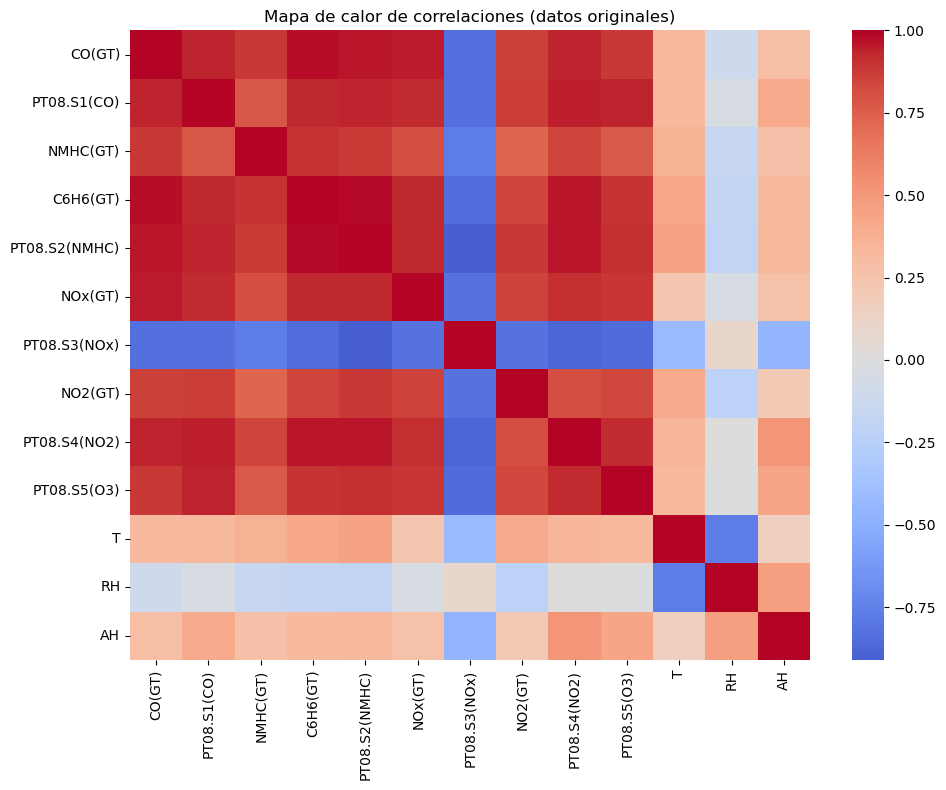

In [14]:
# Seleccionar columnas numéricas
columnas_numericas = df.select_dtypes(include=["float64", "int64"]).columns.tolist()

print("Número de columnas numéricas:", len(columnas_numericas))

# Histograma de las variables numéricas
plt.figure(figsize=(12, 10))
df[columnas_numericas].hist(bins=30, figsize=(12, 10))
plt.tight_layout()
plt.show()

# Mapa de calor de correlaciones
plt.figure(figsize=(10, 8))
matriz_corr = df[columnas_numericas].corr()
sns.heatmap(matriz_corr, cmap="coolwarm", center=0)
plt.title("Mapa de calor de correlaciones (datos originales)")
plt.tight_layout()
plt.show()

## Paso 2 - Implementación

A continuación se preparan los conjuntos de entrenamiento y prueba utilizando los atributos seleccionados en el paso anterior. Seguidamente, se implementan los modelos de regresión lineal simple, cada uno de ellos ajustado individualmente frente a la variable objetivo C6H6(GT).

In [15]:
# Lista de atributos seleccionados del paso anterior
feature_cols = ['PT08.S2(NMHC)', 'CO(GT)', 'PT08.S4(NO2)', 'PT08.S1(CO)', 'NOx(GT)']

# Variable objetivo
target_col = 'C6H6(GT)'

# Crear X e y
X = df[feature_cols]
y = df[target_col]

# Hacer el split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

# Mostrar tamaños de cada subconjunto
print("Tamaño X_train:", X_train.shape)
print("Tamaño X_test: ", X_test.shape)
print("Tamaño y_train:", y_train.shape)
print("Tamaño y_test: ", y_test.shape)

Tamaño X_train: (661, 5)
Tamaño X_test:  (166, 5)
Tamaño y_train: (661,)
Tamaño y_test:  (166,)


A continuación se presentan los modelos de regresión lineal simple construidos para cada uno de los atributos seleccionados como predictores de la variable objetivo.

Modelo 1: C6H6(GT) ~ PT08.S2(NMHC)
Coeficiente: 0.02724514887468094
Intercepto: -15.56369966593992


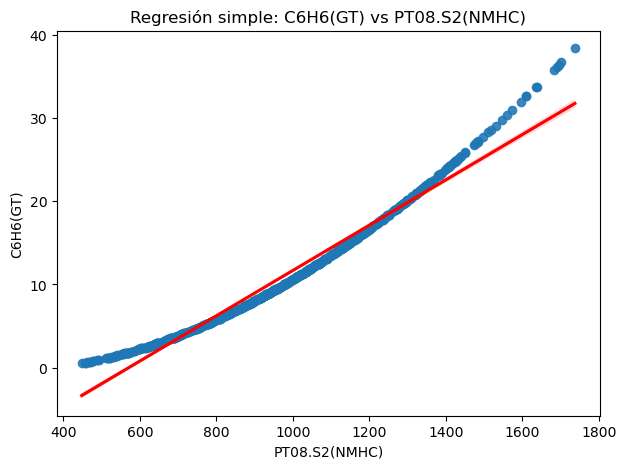

In [16]:
X_train_1 = X_train[['PT08.S2(NMHC)']]
y_train_1 = y_train

model_1 = LinearRegression()
model_1.fit(X_train_1, y_train_1)

print("Modelo 1: C6H6(GT) ~ PT08.S2(NMHC)")
print("Coeficiente:", model_1.coef_[0])
print("Intercepto:", model_1.intercept_)

plt.figure(figsize=(7,5))
sns.scatterplot(x=X_train_1['PT08.S2(NMHC)'], y=y_train_1, alpha=0.4)
sns.regplot(x=X_train_1['PT08.S2(NMHC)'], y=y_train_1, line_kws={'color':'red'})
plt.title("Regresión simple: C6H6(GT) vs PT08.S2(NMHC)")
plt.xlabel("PT08.S2(NMHC)")
plt.ylabel("C6H6(GT)")
plt.show()

Modelo 2: C6H6(GT) ~ CO(GT)
Coeficiente: 5.094833469716169
Intercepto: -1.2167323712760485


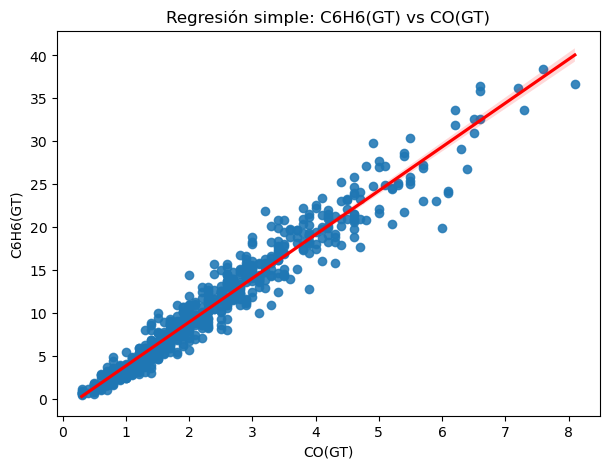

In [17]:
X_train_2 = X_train[['CO(GT)']]
y_train_2 = y_train

model_2 = LinearRegression()
model_2.fit(X_train_2, y_train_2)

print("Modelo 2: C6H6(GT) ~ CO(GT)")
print("Coeficiente:", model_2.coef_[0])
print("Intercepto:", model_2.intercept_)

plt.figure(figsize=(7,5))
sns.scatterplot(x=X_train_2['CO(GT)'], y=y_train_2, alpha=0.4)
sns.regplot(x=X_train_2['CO(GT)'], y=y_train_2, line_kws={'color':'red'})
plt.title("Regresión simple: C6H6(GT) vs CO(GT)")
plt.xlabel("CO(GT)")
plt.ylabel("C6H6(GT)")
plt.show()

Modelo 3: C6H6(GT) ~ PT08.S4(NO2)
Coeficiente: 0.023475453916010504
Intercepto: -26.792474799215363


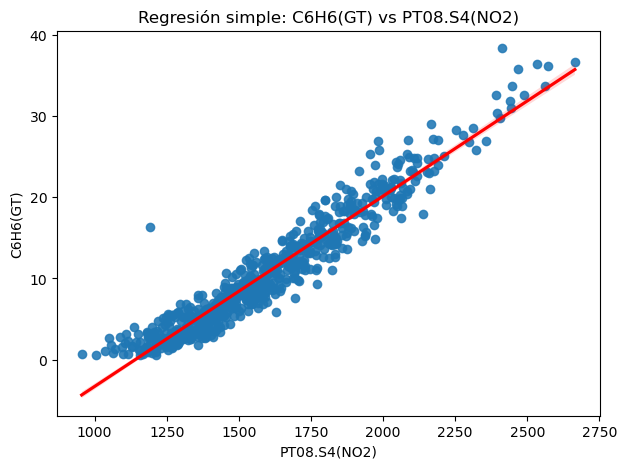

In [18]:
X_train_3 = X_train[['PT08.S4(NO2)']]
y_train_3 = y_train

model_3 = LinearRegression()
model_3.fit(X_train_3, y_train_3)

print("Modelo 3: C6H6(GT) ~ PT08.S4(NO2)")
print("Coeficiente:", model_3.coef_[0])
print("Intercepto:", model_3.intercept_)

plt.figure(figsize=(7,5))
sns.scatterplot(x=X_train_3['PT08.S4(NO2)'], y=y_train_3, alpha=0.4)
sns.regplot(x=X_train_3['PT08.S4(NO2)'], y=y_train_3, line_kws={'color':'red'})
plt.title("Regresión simple: C6H6(GT) vs PT08.S4(NO2)")
plt.xlabel("PT08.S4(NO2)")
plt.ylabel("C6H6(GT)")
plt.show()

Modelo 4: C6H6(GT) ~ PT08.S1(CO)
Coeficiente: 0.028611518082898323
Intercepto: -23.75021147287852


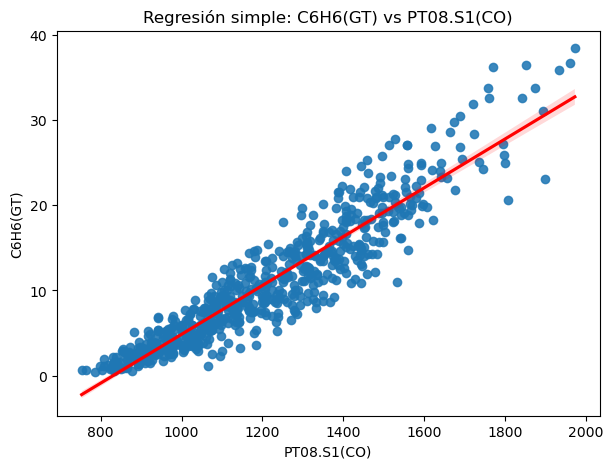

In [19]:
X_train_4 = X_train[['PT08.S1(CO)']]
y_train_4 = y_train

model_4 = LinearRegression()
model_4.fit(X_train_4, y_train_4)

print("Modelo 4: C6H6(GT) ~ PT08.S1(CO)")
print("Coeficiente:", model_4.coef_[0])
print("Intercepto:", model_4.intercept_)

plt.figure(figsize=(7,5))
sns.scatterplot(x=X_train_4['PT08.S1(CO)'], y=y_train_4, alpha=0.4)
sns.regplot(x=X_train_4['PT08.S1(CO)'], y=y_train_4, line_kws={'color':'red'})
plt.title("Regresión simple: C6H6(GT) vs PT08.S1(CO)")
plt.xlabel("PT08.S1(CO)")
plt.ylabel("C6H6(GT)")
plt.show()

Modelo 5: C6H6(GT) ~ NOx(GT)
Coeficiente: 0.08336136846681852
Intercepto: -1.1738477760272055


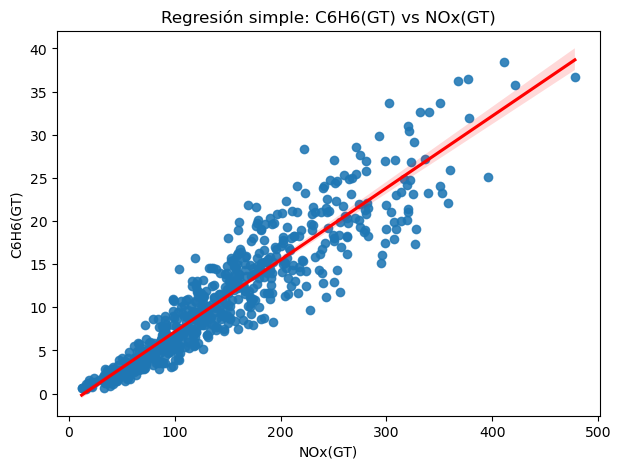

In [20]:
X_train_5 = X_train[['NOx(GT)']]
y_train_5 = y_train

model_5 = LinearRegression()
model_5.fit(X_train_5, y_train_5)

print("Modelo 5: C6H6(GT) ~ NOx(GT)")
print("Coeficiente:", model_5.coef_[0])
print("Intercepto:", model_5.intercept_)

plt.figure(figsize=(7,5))
sns.scatterplot(x=X_train_5['NOx(GT)'], y=y_train_5, alpha=0.4)
sns.regplot(x=X_train_5['NOx(GT)'], y=y_train_5, line_kws={'color':'red'})
plt.title("Regresión simple: C6H6(GT) vs NOx(GT)")
plt.xlabel("NOx(GT)")
plt.ylabel("C6H6(GT)")
plt.show()

### Paso 3 - Evaluación

A continuación se evalúan los modelos de regresión lineal simple construidos para cada uno de los cinco atributos seleccionados, utilizando diversas métricas de rendimiento (R², MAE, MSE y RMSE). Como primer paso, se calculan todas las métricas para cada modelo y, posteriormente, se emplean representaciones visuales para facilitar la comparación entre ellos y extraer conclusiones fundamentadas sobre su desempeño. 

Para evaluar el desempeño de los modelos de regresión simple se emplearon cuatro métricas estándar. El R² indica qué proporción de la variabilidad de la variable objetivo es explicada por el modelo; valores cercanos a 1 implican un ajuste fuerte. El MAE (Mean Absolute Error) mide el error medio absoluto entre los valores reales y los predichos. El MSE (Mean Squared Error) penaliza más los errores grandes al elevar las diferencias al cuadrado, lo que lo hace especialmente útil para detectar predicciones muy desviadas. Finalmente, el RMSE (Root Mean Squared Error) es la raíz cuadrada del MSE y expresa el error en las mismas unidades que la variable objetivo, lo que facilita su interpretación. En conjunto, estas métricas permiten comparar los modelos tanto en términos de precisión general como de la magnitud de sus errores.

In [23]:
# Modelo 1 para atributo PT08.S2
X_test_1 = X_test[['PT08.S2(NMHC)']]
y_test_1 = y_test

y_pred_1 = model_1.predict(X_test_1)

r2_1 = r2_score(y_test_1, y_pred_1)
mae_1 = mean_absolute_error(y_test_1, y_pred_1)
mse_1 = mean_squared_error(y_test_1, y_pred_1)
rmse_1 = np.sqrt(mse_1)

print("Modelo 1: C6H6(GT) ~ PT08.S2(NMHC)")
print("R²:  ", r2_1)
print("MAE: ", mae_1)
print("MSE: ", mse_1)
print("RMSE:", rmse_1)

Modelo 1: C6H6(GT) ~ PT08.S2(NMHC)
R²:   0.9685612816966743
MAE:  0.9909861559246821
MSE:  1.8705660892545868
RMSE: 1.3676864001863098


In [25]:
# Modelo 2 para atributo CO(GT)
X_test_2 = X_test[['CO(GT)']]
y_test_2 = y_test

y_pred_2 = model_2.predict(X_test_2)

r2_2 = r2_score(y_test_2, y_pred_2)
mae_2 = mean_absolute_error(y_test_2, y_pred_2)
mse_2 = mean_squared_error(y_test_2, y_pred_2)
rmse_2 = np.sqrt(mse_2)

print("Modelo 2: C6H6(GT) ~ CO(GT)")
print("R²:  ", r2_2)
print("MAE: ", mae_2)
print("MSE: ", mse_2)
print("RMSE:", rmse_2)

Modelo 2: C6H6(GT) ~ CO(GT)
R²:   0.948962176797018
MAE:  1.2443446878449298
MSE:  3.0366893596540123
RMSE: 1.742609927566698


In [26]:
# Modelo 3 para atributo PT08.S4(NO2)
X_test_3 = X_test[['PT08.S4(NO2)']]
y_test_3 = y_test

y_pred_3 = model_3.predict(X_test_3)

r2_3 = r2_score(y_test_3, y_pred_3)
mae_3 = mean_absolute_error(y_test_3, y_pred_3)
mse_3 = mean_squared_error(y_test_3, y_pred_3)
rmse_3 = np.sqrt(mse_3)

print("Modelo 3: C6H6(GT) ~ PT08.S4(NO2)")
print("R²:  ", r2_3)
print("MAE: ", mae_3)
print("MSE: ", mse_3)
print("RMSE:", rmse_3)

Modelo 3: C6H6(GT) ~ PT08.S4(NO2)
R²:   0.9269547564536845
MAE:  1.6722844575713876
MSE:  4.346104514846785
RMSE: 2.0847312812079126


In [27]:
# Modelo 4 para atributo PT08.S1(CO)
X_test_4 = X_test[['PT08.S1(CO)']]
y_test_4 = y_test

y_pred_4 = model_4.predict(X_test_4)

r2_4 = r2_score(y_test_4, y_pred_4)
mae_4 = mean_absolute_error(y_test_4, y_pred_4)
mse_4 = mean_squared_error(y_test_4, y_pred_4)
rmse_4 = np.sqrt(mse_4)

print("Modelo 4: C6H6(GT) ~ PT08.S1(CO)")
print("R²:  ", r2_4)
print("MAE: ", mae_4)
print("MSE: ", mse_4)
print("RMSE:", rmse_4)

Modelo 4: C6H6(GT) ~ PT08.S1(CO)
R²:   0.8724903145247935
MAE:  2.155626588975748
MSE:  7.586673585106307
RMSE: 2.7543916905745824


In [28]:
# Modelo 5 para atributo NOx(GT)
X_test_5 = X_test[['NOx(GT)']]
y_test_5 = y_test

y_pred_5 = model_5.predict(X_test_5)

r2_5 = r2_score(y_test_5, y_pred_5)
mae_5 = mean_absolute_error(y_test_5, y_pred_5)
mse_5 = mean_squared_error(y_test_5, y_pred_5)
rmse_5 = np.sqrt(mse_5)

print("Modelo 5: C6H6(GT) ~ NOx(GT)")
print("R²:  ", r2_5)
print("MAE: ", mae_5)
print("MSE: ", mse_5)
print("RMSE:", rmse_5)

Modelo 5: C6H6(GT) ~ NOx(GT)
R²:   0.8596235607318737
MAE:  2.091212054172986
MSE:  8.35223002705825
RMSE: 2.890022495943284


Tras ajustar cinco modelos de regresión lineal simple utilizando como predictores las variables con mayor correlación con C6H6(GT), se evaluó su desempeño sobre el conjunto de prueba mediante las métricas R², MAE, MSE y RMSE. Los resultados obtenidos se muestran en la tabla siguiente:

In [29]:
resultados = pd.DataFrame({
    "Predictor": [
        "PT08.S2(NMHC)",
        "CO(GT)",
        "PT08.S4(NO2)",
        "PT08.S1(CO)",
        "NOx(GT)"
    ],
    "R2":   [r2_1, r2_2, r2_3, r2_4, r2_5],
    "MAE":  [mae_1, mae_2, mae_3, mae_4, mae_5],
    "MSE":  [mse_1, mse_2, mse_3, mse_4, mse_5],
    "RMSE": [rmse_1, rmse_2, rmse_3, rmse_4, rmse_5]
})

# Ordenamos por RMSE (de menor a mayor error)
resultados_ordenados = resultados.sort_values(by="RMSE")
resultados_ordenados

,Predictor,R2,MAE,MSE,RMSE
0,PT08.S2(NMHC),0.968561,0.990986,1.870566,1.367686
1,CO(GT),0.948962,1.244345,3.036689,1.742610
2,PT08.S4(NO2),0.926955,1.672284,4.346105,2.084731
3,PT08.S1(CO),0.872490,2.155627,7.586674,2.754392
4,NOx(GT),0.859624,2.091212,8.352230,2.890022


### Conclusiones

Los resultados obtenidos permiten observar diferencias claras en la capacidad predictiva de cada uno de los modelos de regresión simple. Entre todos los predictores evaluados, la variable PT08.S2(NMHC) destaca con mucha diferencia como el mejor estimador de la concentración de benceno. Su modelo alcanza un valor de R² cercano al 0.97 y presenta los menores valores de MAE, MSE y RMSE. Esto indica una relación lineal muy fuerte y un ajuste notablemente preciso.

El segundo mejor modelo es el construido con la variable CO(GT). Aunque su precisión es inferior a la del primer modelo, mantiene un R² alrededor de 0.95 y errores razonablemente bajos. Esto sugiere que la concentración de monóxido de carbono presenta una fuerte relación con los niveles de benceno..

El modelo basado en PT08.S4(NO2) muestra un R² cercano al 0.93 y un error algo mayor. Aunque la relación es más débil que en los modelos anteriores, sigue existiendo una asociación clara entre la respuesta del sensor y el benceno.

Los modelos basados en PT08.S1(CO) y NOx(GT) muestran el rendimiento más bajo de todos los predictores evaluados. Sus valores de R² se sitúan en torno al 0.86–0.87, y los errores MAE, MSE y RMSE son considerablemente superiores. Esto indica que ambas variables explican una proporción menor de la variabilidad del benceno y generan predicciones menos precisas. Aunque siguen mostrando cierta relación con la concentración de C6H6(GT), la dispersión de los datos alrededor de la recta de regresión es mayor, lo que limita su utilidad como predictores individuales.

### ¿Hay alguna variable que sea capaz de predecir de forma precisa la concentración de benzeno?

Los resultados muestran que, entre todas los atributos analizados, solo PT08.S2(NMHC) es capaz de predecir la concentración de benceno con un nivel de precisión elevado dentro del marco de una regresión simple. Su valor de R² cercano al 0.97 indica que esta variable explica casi toda la variabilidad observada en C6H6(GT), y sus errores MAE, MSE y RMSE son notablemente inferiores a los del resto de modelos. Esto sugiere que la respuesta del sensor PT08.S2, relacionado con la detección de hidrocarburos no metánicos, está fuertemente alineada con la presencia de benceno en el aire urbano.